In [4]:
#Headers and libraries that we're gonna use

%matplotlib inline

#print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces #The faces!
from sklearn.utils.validation import check_random_state #to put a global seed for random number generator

#Regressor algorithms
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

In [5]:
%matplotlib inline
import numpy as np
import scipy.misc as scp_misc
#from sklearn import feature_extraction.image as img

palomo_faces = ["palomo1.jpeg", "palomo2.jpeg", "palomo3.jpeg", "palomo4.jpeg", "palomo5.jpeg"]
palomo_vector = []

import matplotlib.pyplot as plt
for palomo in palomo_faces:    
    img = scp_misc.imread(palomo, mode="L")
    print img.shape
    img = scp_misc.imresize(img, 25)
    print img.shape
    palomo_vector.append(img)
    
n_pixels = img.shape[0]*img.shape[1]

#print palomo_vector
a = 0
while (a < len(palomo_vector)):
    palomo_vector[a] = np.reshape(palomo_vector[a], -1)
    a += 1

(640, 480)
(160, 120)
(640, 480)
(160, 120)
(640, 480)
(160, 120)
(640, 480)
(160, 120)
(640, 480)
(160, 120)


In [6]:
X_train = []
y_train = []
X_test = []
y_test = []

i = 0
while (i < 3) :
    palomo = palomo_vector[i]
    X_train.append(palomo[:int(np.ceil(0.5 * n_pixels))])
    y_train.append(palomo[int(np.floor(0.5 * n_pixels)):])
    i += 1
while (i < 5) :
    palomo = palomo_vector[i]
    X_test.append(palomo[:int(np.ceil(0.5 * n_pixels))])
    y_test.append(palomo[int(np.floor(0.5 * n_pixels)):])
    i += 1
    
print("Palomos used for training: %i " % len(X_train))    
print("Palomos used for testing: %i " % len(X_test))

print("Upper part palomo: %i" % len(X_train[0]))
print("Lower part palomo: %i" % len(y_train[0]))

    
ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(n_estimators=10, max_features=32, random_state=0),
    #"K-nn": KNeighborsRegressor(),
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
}


y_test_predict = dict()

for name, estimator in ESTIMATORS.items() :
    estimator.fit(X_train, y_train)
    y_test_predict[name] = estimator.predict(X_test)

Palomos used for training: 3 
Palomos used for testing: 2 
Upper part palomo: 9600
Lower part palomo: 9600


/home/ramon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/ramon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:31: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


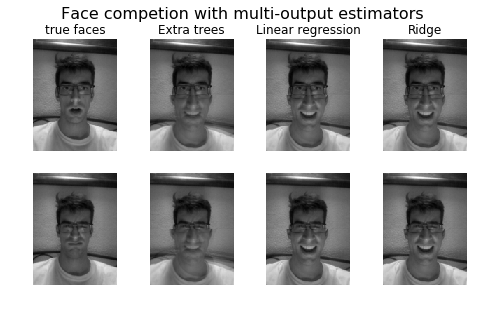

In [7]:
#Plot the completed faces
n_faces = 2
image_shape = (640*0.25, 480*0.25)
n_cols = 1 + len(ESTIMATORS)
plt.figure(figsize=(2.*n_cols, 2.26*n_faces))
plt.suptitle("Face competion with multi-output estimators", size=16)

for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i]))
    
    if i:
        sub = plt.subplot(n_faces, n_cols, i*n_cols+1)
    else :
        sub = plt.subplot(n_faces, n_cols, i*n_cols+1, title="true faces")
        
    sub.axis("off")
    sub.imshow(true_face.reshape(image_shape),
              cmap=plt.cm.gray,
              interpolation="nearest")
    
    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], y_test_predict[est][i]))
        
        
        if i :
            sub = plt.subplot(n_faces, n_cols, i*n_cols+2+j)
        else :
            sub = plt.subplot(n_faces, n_cols, i*n_cols+2+j, title=est)
            
        sub.axis("off")
        sub.imshow(completed_face.reshape(image_shape),
                  cmap=plt.cm.gray,
                  interpolation="nearest")
        
plt.show()